In [16]:
import arcpy

from importlib.util import find_spec

In [8]:
has_h3 = False if find_spec('h3') is None else True

has_h3

True

In [9]:
if not has_h3:
    raise EnvironmentError("The h3-py package does not appear to be available in the current Python environment. Creating H3 geometries from H3 indices "
                           "requires the h3-py package to be installed in the current environment.")

In [10]:
import h3

In [38]:
h3_index = '8001fffffffffff'

geometry_type = 'point'

spatial_reference

name (Geographic Coordinate System),GCS_WGS_1984
factoryCode (WKID),4326
angularUnitName (Angular Unit),Degree
datumName (Datum),D_WGS_1984


In [48]:
def h3_index_to_geometry(h3_index: str, geometry_type: Optional[str] = 'polygon'):

    # all coordinates are in WGS84
    sptl_rfrnc = arcpy.SpatialReference(4326)

    # ensure geometry type is lowercase for comparisons
    geometry_type = geometry_type.lower()

    # since inner H3 errors are strange, catch at higher level
    try:

        if geometry_type == 'point':

            # get the coordinates
            y, x = h3.cell_to_latlng(h3_index)

            # create a point geometry
            geom = arcpy.PointGeometry(arcpy.Point(x, y), spatial_reference=sptl_rfrnc)

        elif geometry_type == 'poly' or geometry_type == 'polygon':

            # get the tuple of tuples with the bounding coordinates for the h3 index polygon boundary
            h3_bndry = h3.cell_to_boundary(h3_index)

            # since the coordinates are y, x pairs, reverse to x, y to create Points and load into an Array
            pt_arr = arcpy.Array([arcpy.Point(x, y) for y, x in h3_bndry])

            # add the first point to the end to close the polygon
            pt_arr.append(pt_arr[0])

            # use the array to create the polygon geometry
            geom = arcpy.Polygon(pt_arr, spatial_reference=sptl_rfrnc)

        else:
            raise ValueError(f'geometry_type must be one of ["point", "polygon"]. You provided "{geometry_type}"')

    except:
        raise ValueError(f'Cannot create geometry for H3 index "{h3_index}"')

    return geom

SyntaxError: 'return' outside function (2197642034.py, line 38)

In [41]:
sptl_rfrnc = arcpy.SpatialReference(4326)

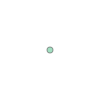

In [46]:
arcpy.PointGeometry(arcpy.Point(x, y), spatial_reference=sptl_rfrnc)